In [2]:
import statsmodels.api as sm
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Analysis of 2018 Operating Costs

### Data 

In [40]:
x1 = [242/365,4,5,6,7,8,9]
x2 = [242/365,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y = [1,6.968707,38.182149,54.162443,163.811997,333.852928,568.273]

In [41]:
x = np.array([x1])
y = np.array(y)

In [42]:
def func(x, a, b):
    return a * np.exp(-b * x) 

In [43]:
curve_fit(f=func,xdata=x1,ydata=y)
popt, pcov = curve_fit(func, x1, y)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [44]:
popt

array([ 1.75026677, -0.64473438])

### Costs of Projects:

### Solving for: ∫ 1.750*e^(0.645*x) = 17,700 gives x = 13.617
### Solving for: ∫ 1.750*e^(0.645*x) = 86,200 gives x = 16.072
### Solving for: ∫ 1.750*e^(0.645*x) = 10,000 gives x = 12.732

In [157]:
mx,my = [13.616,13.617],[0,12000]
ax,ay = [16.071,16.072],[0,60000]
hx,hy = [12.731,12.732],[0,6500]

In [158]:
x2 = np.array(x2)

In [159]:
alphay = [8505,9737,10737,12733,14136,15826,19478,12662,30736]
alphaConvRate = [1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.4,1.3]
alphax = [0,1,2,3,4,5,6,7,8]
alphax = np.array(alphax)
alphay = np.array(alphay)

In [160]:
for i in range(len(alphay)):
    alphay[i] = alphay[i]/alphaConvRate[i]

In [161]:
curve_fit(f=func,xdata=x1,ydata=y)
popt2, pcov = curve_fit(func, alphax, alphay)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


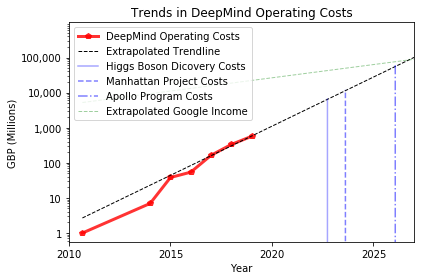

In [162]:
plt.figure()
plt.plot(x1, y, 'pr-', label='DeepMind Operating Costs', linewidth=3.0, alpha=.8)
plt.plot(x2, func(x2, *popt), 'k--', label="Extrapolated Trendline", linewidth=1.0)
plt.plot(hx, hy, 'b-', label='Higgs Boson Dicovery Costs',alpha=0.35)
plt.plot(mx, my, 'b--', label='Manhattan Project Costs',alpha=0.5)
plt.plot(ax, ay, 'b-.', label='Apollo Program Costs',alpha=0.5)
plt.plot(x2, func(x2, *popt2), 'g--', label='Extrapolated Google Income',linewidth=1.0, alpha=0.375)
plt.yscale('log')
plt.xlim(0,17)
plt.xticks([0,5,10,15],['2010','2015','2020','2025'])
plt.yticks([1,10,100,1000,10000,100000],['1','10','100','1,000','10,000','100,000'])
plt.ylabel('GBP (Millions)')#£
plt.xlabel('Year')
plt.title('Trends in DeepMind Operating Costs')
plt.ylim(0,1000000)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('DeepMindOperatingCosts2018',dpi=600)
plt.show()

# Further Analysis of Revenue for 2018 Data

In [163]:
contracts = [1, 40.0, 54.4, 102.8] # 1M approximates zero for log plot aesthetics
cx = [5, 6, 7, 8]
cxl = [5,6,7,8,9,10,11,12,13,14,15,16,17]

In [164]:
popt3, pcov = curve_fit(func, cx, contracts)

In [165]:
cx = np.array(cx)
cxl = np.array(cxl)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


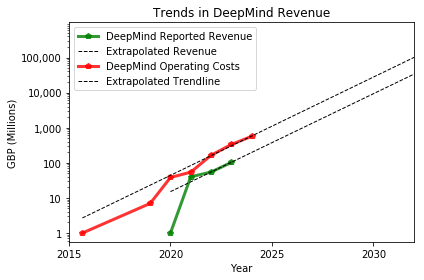

In [166]:
plt.figure()
plt.plot(cx, contracts, 'pg-', label='DeepMind Reported Revenue', linewidth=3.0, alpha=.8)
plt.plot(cxl, func(cxl, *popt3), 'k--', label="Extrapolated Revenue", linewidth=1.0)
plt.plot(x1, y, 'pr-', label='DeepMind Operating Costs', linewidth=3.0, alpha=.8)
plt.plot(x2, func(x2, *popt), 'k--', label="Extrapolated Trendline", linewidth=1.0)
plt.yscale('log')
plt.xlim(0,17)
plt.xticks([0,5,10,15],['2015','2020','2025','2030'])
plt.yticks([1,10,100,1000,10000,100000],['1','10','100','1,000','10,000','100,000'])
plt.ylabel('GBP (Millions)')#£
plt.xlabel('Year')
plt.title('Trends in DeepMind Revenue')
plt.ylim(0,1000000)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('DeepMindRevenue2018',dpi=600)
plt.show()